> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Doctor Appointment Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The dataset contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

* Patient ID : Unique identifier for a patient
* Appointment ID : Unique identifer for a appointment
* 'Gender': whether male or female
* ‘ScheduledDay’ tells us on what day the patient set up their appointment.
* 'Appointment Day' tells us on what day patient has to visit the doctor. 
*  'Age'  : Age of the patients
* ‘Neighborhood’ indicates the location of the hospital.
* ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* ''HyperTension', 'Diabetes', 'Alcoholism' - These indicates whether the patient is suffering from these lifestyle diseases
* 'Handicapped': This dicates whether the person is differently abled or not. 
* The no show column indicates whether the patient turned up for the appointment or not (Yes indicates no show and no indicates that the patient showed up)


## Dependent and Independent variables
Aim of this analyis to is to understand the impact of no shows with respect to gender, scholarships and day of the week

Dependent Variable : - No Shows
Independent Variable : Gender, Scholarships(Enrollment in welfare program),Day of the week. 

Questions for Analysis
1) Which gender missed most of the appointments and proportion among them missing those appointments ?
2) Does Scholarship plays a role whether the patient turns up or not ?
3) Does weekday play a role in skipping appointments ?


In [107]:
# importing libraries to be used. 

%matplotlib inline
import numpy as np 
import pandas as pd
from datetime import datetime as dt 
import matplotlib.pyplot as plt

In [108]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data. clean the data.
# Read the csv file and analyse the data.

appointment_data = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
## print the first few rows
print(appointment_data.head())
## Analyse the column names
print(appointment_data.columns)
## Total records in the CSV
total_records=appointment_data["AppointmentID"].count()
print(f"The total patient records is {total_records}")



      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

In [109]:
def checkColumnValues(data,columnnames,validvalues):
    '''
    This function checks whether valid values exists for columns Scholarship,Hypertension,Diabetes,
    Alcoholism,Differently_abled,No_show
    '''
 
    count_elements=data[columnnames].isin(validvalues).count()
    for columnname in columnnames:
        if(count_elements[columnname] !=total_records):
            print(f"Data has to be cleansed for {columnname}")
        else:
            print(f"Data in {columnname} has valid inputs. No cleansing required")
    return
    

In [110]:
def checkDuplicateAppts(data):
    ## Function for checking duplicate appointments.
    appointment_ids = appointment_data["AppointmentID"]
    duplicate_appointment_ids=appointment_data[appointment_data.duplicated(['AppointmentID'], keep=False)] ["AppointmentID"]
    if(duplicate_appointment_ids.count()>0):
        print(f"Duplicate Appointments found in the data{duplicate_appointment_ids}")
        print(f"Data cleansing has to be done before proceeding with the analysis")
    else:
        print(f"No Duplicate appointments found in the dataset and no data cleansing required")
    return

In [111]:
def renameColumns(data):
    data.rename(index=str,columns={"Hipertension":"Hypertension","Handcap":"Differently_abled","No-show":"No_show"},inplace=True)
    return;

In [112]:
def checkDateValues(data):
    ## Check whether valid dates are in ScheduledDay
    ## the following call will produce True in output if the dates are not valid
    scheduleddates= pd.to_datetime(appointment_data['ScheduledDay'], errors="coerce").isnull()
    countvalidscheduleddates=scheduleddates.isin([False]).sum()
    if(countvalidscheduleddates!=total_records):
        print(f"one or more scheduled day dont have valid dates")
    else:
        print(f"Dates are valid in Scheduled day. No data cleansing required")
    ## Check whether valid dates are in AppointmentDay
    ## the following call will produce True in output if the dates are not valid
    AppointmentDates= pd.to_datetime(appointment_data['AppointmentDay'], errors="coerce").isnull()
    countvalidAppointmentdates=AppointmentDates.isin([False]).sum()
    if(countvalidAppointmentdates!=total_records):
        print(f"one or more Appointment day dont have valid dates")
    else:
        print(f"Dates are valid in Appointment day. No data cleansing required")
    return        

In [113]:
def dataWranglingCleaning(appointment_data):
    
    renameColumns(appointment_data)
    appointment_data.Scholarship.replace([0,1],["N","Y"],inplace=True)
    appointment_data.Hypertension.replace([0,1],["N","Y"],inplace=True)
    appointment_data.Diabetes.replace([0,1],["N","Y"],inplace=True)
    appointment_data.Alcoholism.replace([0,1],["N","Y"],inplace=True)
    appointment_data.Differently_abled.replace([0,1],["N","Y"],inplace=True)
    appointment_data.No_show.replace(["No","Yes"],["N","Y"],inplace=True)
    ## checking for Duplicate Appointments in dataset
    checkDuplicateAppts(appointment_data)
    ## Checking valid values for Scholarship, Hypertension, Diabetes,Alcholism,Differently Abled, No Show
    columnnames=["Scholarship","Hypertension","Diabetes","Alcoholism","Differently_abled","No_show"]
    validvalues=["Y","N"]
    checkColumnValues(appointment_data,columnnames,validvalues)
    ## Checking valid values for Gender
    columnnames=["Gender"]
    validvalues=["M","F"]
    checkColumnValues(appointment_data,columnnames,validvalues)
    ## Checking whether valid dates exist in columns scheduled day and Appointment day
    checkDateValues(appointment_data)
    return

In [114]:
dataWranglingCleaning(appointment_data)
print(f"Printing Cleansed data")
print(appointment_data.head())

No Duplicate appointments found in the dataset and no data cleansing required
Data in Scholarship has valid inputs. No cleansing required
Data in Hypertension has valid inputs. No cleansing required
Data in Diabetes has valid inputs. No cleansing required
Data in Alcoholism has valid inputs. No cleansing required
Data in Differently_abled has valid inputs. No cleansing required
Data in No_show has valid inputs. No cleansing required
Data in Gender has valid inputs. No cleansing required
Dates are valid in Scheduled day. No data cleansing required
Dates are valid in Appointment day. No data cleansing required
Printing Cleansed data
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which Gender missed most number of appointments)

In [115]:
def getTotalAppts(data):
       return data["PatientId"].count()


In [116]:
def getApptsbyPercentage(appts,total_appts):
   return appts*100/tot_appts

In [117]:
def filterbyColumn(data,filtercolumn,filtervalue):
    ## Filter for gender
    if(filtercolumn=="GE"):
        filtereddata=data[data.Gender==filtervalue]
    elif(filtercolumn=="NS"): 
        filtereddata=data[data.No_show==filtervalue]    
    elif(filtercolumn=="SL"): 
        filtereddata= data[data.Scholarship==filtervalue]
    return filtereddata

In [118]:
# Use this, and more code cells, to explore your data. Don't forget to add
# Markdown cells to document your observations and findings.

## Total appointments in the dataset
dict_filters={"GE":["M","F"],"NS":["Y","N"],"SL":["Y","N"]}
list_filters_columns=[]
list_filters_values=[]
list_filters_columns=list(dict_filters.keys())
list_filters_values=list(dict_filters.values())

tot_appts = getTotalAppts(appointment_data)
print(f"The total appointments is {tot_appts}")
## Data Frame containing male appts only
male_appts=filterbyColumn(appointment_data,list_filters_columns[0],list_filters_values[0][0])
## Total Male appointments in dataset. 
tot_male_appts=getTotalAppts(male_appts)
print(f"The total male appointments is {tot_male_appts}")

## Total Female appointments in dataset
## Data Frame containing Female appts only
female_appts=filterbyColumn(appointment_data,list_filters_columns[0],list_filters_values[0][1])
tot_female_appts=getTotalAppts(female_appts)
print(f"The total female appointments is {tot_female_appts}")

##Cross verify. If the below statement is not true, need to look at the data and see whether any data has to be cleansed. 
if(tot_appts!=tot_male_appts+tot_female_appts):
    print(f"Please check the code")
    

The total appointments is 110527
The total male appointments is 38687
The total female appointments is 71840


In [119]:

## Proportion of males and Females appointments

tot_male_appts_percentage=getApptsbyPercentage(tot_male_appts,tot_appts)
print(f"The total male appointments by percentage is {tot_male_appts_percentage}")

tot_female_appts_percentage=getApptsbyPercentage(tot_female_appts,tot_appts)
print(f"The total female appointments by percentage is {tot_female_appts_percentage}")

## Data Frame containing Males who did not honor the appts . 
male_appts_no_show=filterbyColumn(male_appts,list_filters_columns[1],list_filters_values[1][0])

##Count of  male who missed appointments
tot_male_no_show=male_appts_no_show["PatientId"].count()

##Count of Male honoring appointments.
tot_male_show = tot_male_appts-tot_male_no_show

## Percentage of Male no shows compared to total Male appts. 
tot_male_no_show_percentage=tot_male_no_show*100/tot_male_appts

print(f"The total no of missed appointments by Male Gender in absolute terms is {tot_male_no_show}")
print(f"The total no of missed appointments by Male Gender in relative terms is {tot_male_no_show_percentage}")
## Missed appointments female

## Data Frame containing Female appts with no show.
female_appts_no_show=filterbyColumn(female_appts,list_filters_columns[1],list_filters_values[1][0])

tot_female_no_show=female_appts_no_show["PatientId"].count()
tot_female_no_show_percentage=tot_female_no_show*100/tot_female_appts
tot_female_show=tot_female_appts-tot_female_no_show
print(f"The total no of missed appointments by female Gender in absolute terms is {tot_female_no_show}")
print(f"The total no of missed appointments by female Gender in relative terms is {tot_female_no_show_percentage}")


The total male appointments by percentage is 35.00230712857492
The total female appointments by percentage is 64.99769287142509
The total no of missed appointments by Male Gender in absolute terms is 7725
The total no of missed appointments by Male Gender in relative terms is 19.967947889471915
The total no of missed appointments by female Gender in absolute terms is 14594
The total no of missed appointments by female Gender in relative terms is 20.31458797327394


In [120]:
## Total no show 
tot_no_show = tot_male_no_show+tot_female_no_show

if(tot_male_no_show > tot_female_no_show):
    print(f"The number of appointments missed by male is greather than female in absolute terms \
           by {tot_male_no_show-tot_female_no_show}")
elif(tot_female_no_show > tot_male_no_show):
    print(f"The number of appointments missed by female is greather than male in absolute terms \
           by {tot_female_no_show-tot_male_no_show}")
else:
    print(f"Both Male and Female miss appointments equally in absolute terms")

The number of appointments missed by female is greather than male in absolute terms            by 6869


In [121]:
## comparing relative percentage of male and female no shows. 
if(tot_male_no_show_percentage > tot_female_no_show_percentage):
    print(f"The number of appointments missed by male is greather than female in relative terms \
           by {tot_male_no_show_percentage-tot_female_no_show_percentage}%")
elif(tot_female_no_show > tot_male_no_show):
    print(f"The number of appointments missed by female is greather than male in relative terms \
           by {tot_female_no_show_percentage-tot_male_no_show_percentage}%")
else:
    print(f"Both Male and Female miss appointments equally in relative terms")


The number of appointments missed by female is greather than male in relative terms            by 0.3466400838020256%


In [122]:
def drawPieChart(title,labels,sizes):
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title,fontweight="bold")
    plt.show()
    return

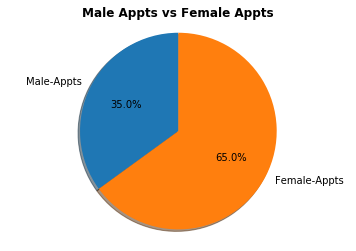

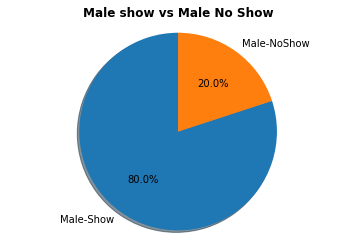

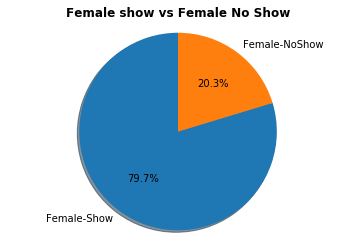

In [123]:
## Pie Chart showing male vs Female total appointments
labels=["Male-Appts","Female-Appts"]
sizes=[tot_male_appts,tot_female_appts]
title="Male Appts vs Female Appts"
drawPieChart(title,labels,sizes)

    
## pie chart representing male show vs Male No show

labels=["Male-Show","Male-NoShow"]
sizes=[tot_male_show,tot_male_no_show]
title= "Male show vs Male No Show"
drawPieChart(title,labels,sizes)

## pie chart representing Female show vs FeMale No show
labels=["Female-Show","Female-NoShow"]
sizes=[tot_female_show,tot_female_no_show]
title="Female show vs Female No Show"
drawPieChart(title,labels,sizes)



### Inferences from Pie Charts for Research Question 1 (Which Gender missed most number of appointments)
1) Female appointments are more than Male appointments by a whooping 30%. Further analysis should be done to figure out why females are visiting doctors more compared to males. The dataset does not have enough data to analysis this point. 
2) Gender wise , percentage of people missing appointments are more or less same (20% for Male vs 20.3% for female). So the data shows clearly that gender does not play a major role in missing appointments. 

### Research Question 2  (Does scholarship play a role in people missing appointments)

In [124]:
# Continue to explore the data 
male_with_scholarships =filterbyColumn(male_appts,list_filters_columns[2],list_filters_values[2][0])
male_without_scholarships =filterbyColumn(male_appts,list_filters_columns[2],list_filters_values[2][1])
tot_male_with_scholarships =getTotalAppts(male_with_scholarships)
tot_male_without_scholarships = getTotalAppts(male_without_scholarships)
female_with_scholarships = filterbyColumn(female_appts,list_filters_columns[2],list_filters_values[2][0])
female_without_scholarships =filterbyColumn(female_appts,list_filters_columns[2],list_filters_values[2][1]) 
tot_female_with_scholarships =getTotalAppts(female_with_scholarships)
tot_female_without_scholarships = getTotalAppts(female_without_scholarships)

In [125]:

## slicing by gender - No Show with and without scholarship - Male
male_no_shows_withoutscholarships=filterbyColumn(male_appts_no_show,list_filters_columns[2],list_filters_values[2][1])
count_male_no_shows_withoutscholarships=getTotalAppts(male_no_shows_withoutscholarships)
male_no_shows_withscholarships=filterbyColumn(male_appts_no_show,list_filters_columns[2],list_filters_values[2][0])
count_male_no_shows_withscholarships=getTotalAppts(male_no_shows_withscholarships)

In [126]:
## slicing by gender - No Show with and without scholarship - Female 
female_no_shows_withoutscholarships=filterbyColumn(female_appts_no_show,list_filters_columns[2],list_filters_values[2][1])
count_female_no_shows_withoutscholarships=getTotalAppts(female_no_shows_withoutscholarships)
female_no_shows_withscholarships=filterbyColumn(female_appts_no_show,list_filters_columns[2],list_filters_values[2][0])
count_female_no_shows_withscholarships=getTotalAppts(female_no_shows_withscholarships)

In [127]:

##Slicing of Scholarships - No show with and without scholarship - Gender Neutral
total_no_shows_without_scholarships =count_male_no_shows_withoutscholarships + count_female_no_shows_withoutscholarships
total_no_shows_with_scholarships=count_male_no_shows_withscholarships +count_female_no_shows_withscholarships
total_percentage_no_shows_without_scholarships=total_no_shows_without_scholarships*100/tot_no_show
total_percentage_no_shows_with_scholarships=total_no_shows_with_scholarships*100/tot_no_show


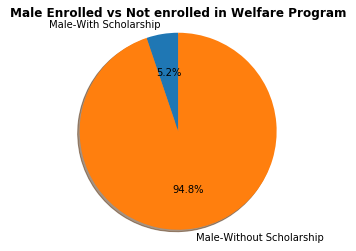

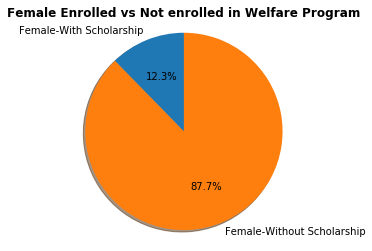

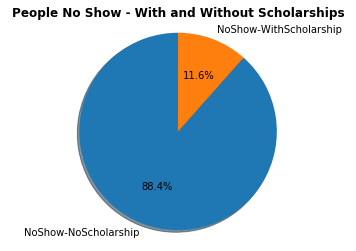

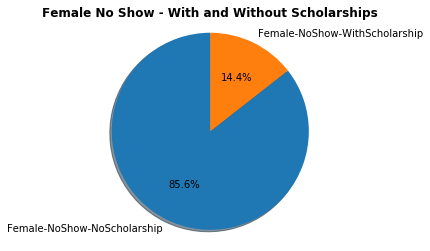

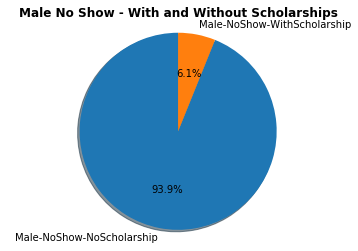

In [128]:
'''
percentage of male  enrolled vs not enrolled in Welfare program (aka. with Scholarship and without Scholarship)
'''
## pie chart representing percentage of male  enrolled vs not enrolled in Welfare program 

labels=["Male-With Scholarship","Male-Without Scholarship"]
sizes=[tot_male_with_scholarships,tot_male_without_scholarships]
title = "Male Enrolled vs Not enrolled in Welfare Program"
drawPieChart(title,labels,sizes)
'''
percentage of male  enrolled vs not enrolled in Welfare program (aka. with Scholarship and without Scholarship)
'''
## pie chart representing percentage of female  enrolled vs not enrolled in Welfare program 


labels=["Female-With Scholarship","Female-Without Scholarship"]
sizes=[tot_female_with_scholarships,tot_female_without_scholarships]
title="Female Enrolled vs Not enrolled in Welfare Program"
drawPieChart(title,labels,sizes)
'''

How much percentage of people with scholarships skip appointments compare to people without scholarships
'''
## pie chart representing people who dont show up for scheduled appointments, with scholarship and without scholarship.


labels=["NoShow-NoScholarship","NoShow-WithScholarship"]
sizes=[total_no_shows_without_scholarships,total_no_shows_with_scholarships]
title = "People No Show - With and Without Scholarships"
drawPieChart(title,labels,sizes)



'''
How much percentage of female with scholarships skip appointments compare to female without scholarships
'''
## pie chart representing female who dont show up for scheduled appointments, with scholarship and without scholarship.


labels=["Female-NoShow-NoScholarship","Female-NoShow-WithScholarship"]
sizes=[count_female_no_shows_withoutscholarships,count_female_no_shows_withscholarships]
title = "Female No Show - With and Without Scholarships"
drawPieChart(title,labels,sizes)


'''
How much percentage of male with scholarships skip appointments compare to male without scholarships
'''
## pie chart representing male who dont show up for scheduled appointments, with scholarship and without scholarship.


labels=["Male-NoShow-NoScholarship","Male-NoShow-WithScholarship"]
sizes=[count_male_no_shows_withoutscholarships,count_male_no_shows_withscholarships]
title = "Male No Show - With and Without Scholarships"
drawPieChart(title,labels,sizes)



###  Research Question 2  (Does scholarship play a role in people missing appointments)
Enrollment in Brasilian welfare program Bolsa Família is very less. It is only 5.2% in case of male and 12.3% in case of female.  At the same time , analysis of the data clearly shows that the Scholarship (Enrollment in Brasilian welfare program Bolsa Família) plays a major role. People who are enrolled in the welfare program does not miss the appointments compared to people who are not enrolled. This trend is seen across both the genders with more pronouncement in case of males.A whooping 94% of male who are not part of the welfare program skip scheduled appointments whereas only 6% of male who are part of the welfare program miss the scheduled appointments. Similarly a whooping 85.6% of female who are not part of the welfare program skip scheduled appointments whereas only 14.4% of female who are part of the welfare program miss the scheduled appointments. Ensuring enrollment of people in the welfare program will improve the scheduled appointment adherence. There is not enough information in this dataset to understand what is the criteria for enrolling in the welfare scheme and why people are not opting for it.

### Research Question 3  (Does day of the week play a role in people missing appointments)

In [129]:
def getApptsbyDayWise(data,dayofweek):
    return data[(data.day_of_week==dayofweek)]

In [130]:
def getDayTotalAppts(data):
    return data["PatientId"].count()

In [131]:
day_of_week=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
## Adding day of the week to the Appointment data set. 
appointment_data["day_of_week"] = pd.to_datetime(appointment_data["AppointmentDay"]).dt.weekday
appointment_data.day_of_week.replace([0,1,2,3,4,5,6],day_of_week,inplace=True)

In [132]:
## Get Appointment day wise
appointments_Mon= getApptsbyDayWise(appointment_data,day_of_week[0])
appointments_Tue= getApptsbyDayWise(appointment_data,day_of_week[1])
appointments_Wed= getApptsbyDayWise(appointment_data,day_of_week[2])
appointments_Thu= getApptsbyDayWise(appointment_data,day_of_week[3])
appointments_Fri= getApptsbyDayWise(appointment_data,day_of_week[4])
appointments_Sat= getApptsbyDayWise(appointment_data,day_of_week[5])

In [133]:
## Get Count of Appointment Day Wise
total_appointments_mon = getDayTotalAppts(appointments_Mon)
total_appointments_tue = getDayTotalAppts(appointments_Tue)
total_appointments_wed = getDayTotalAppts(appointments_Wed)
total_appointments_thu = getDayTotalAppts(appointments_Thu)
total_appointments_fri = getDayTotalAppts(appointments_Fri)
total_appointments_sat = getDayTotalAppts(appointments_Sat)

In [134]:
##Genderwise, Day wise (show vs no show) -Female
female_appointments_Mon =filterbyColumn(appointments_Mon,list_filters_columns[0],list_filters_values[0][1])
female_appointments_Tue =filterbyColumn(appointments_Tue,list_filters_columns[0],list_filters_values[0][1])
female_appointments_Wed =filterbyColumn(appointments_Wed,list_filters_columns[0],list_filters_values[0][1])
female_appointments_Thu =filterbyColumn(appointments_Thu,list_filters_columns[0],list_filters_values[0][1])
female_appointments_Fri =filterbyColumn(appointments_Fri,list_filters_columns[0],list_filters_values[0][1])
female_appointments_Sat =filterbyColumn(appointments_Sat,list_filters_columns[0],list_filters_values[0][1])

In [135]:
total_female_appointments_Mon = getTotalAppts(female_appointments_Mon)
total_female_appointments_Tue= getTotalAppts(female_appointments_Tue)
total_female_appointments_Wed= getTotalAppts(female_appointments_Wed)
total_female_appointments_Thu= getTotalAppts(female_appointments_Thu)
total_female_appointments_Fri= getTotalAppts(female_appointments_Fri)
total_female_appointments_Sat= getTotalAppts(female_appointments_Sat)

In [136]:
female_missed_appointments_Mon =filterbyColumn(female_appointments_Mon,list_filters_columns[1],list_filters_values[1][0])
female_missed_appointments_Tue =filterbyColumn(female_appointments_Tue,list_filters_columns[1],list_filters_values[1][0])
female_missed_appointments_Wed =filterbyColumn(female_appointments_Wed,list_filters_columns[1],list_filters_values[1][0])
female_missed_appointments_Thu =filterbyColumn(female_appointments_Thu,list_filters_columns[1],list_filters_values[1][0])
female_missed_appointments_Fri =filterbyColumn(female_appointments_Fri,list_filters_columns[1],list_filters_values[1][0])
female_missed_appointments_Sat =filterbyColumn(female_appointments_Sat,list_filters_columns[1],list_filters_values[1][0])

In [137]:
total_female_missed_appointments_Mon= getTotalAppts(female_missed_appointments_Mon)
total_female_missed_appointments_Tue= getTotalAppts(female_missed_appointments_Tue)
total_female_missed_appointments_Wed= getTotalAppts(female_missed_appointments_Wed)
total_female_missed_appointments_Thu= getTotalAppts(female_missed_appointments_Thu)
total_female_missed_appointments_Fri= getTotalAppts(female_missed_appointments_Fri)
total_female_missed_appointments_Sat= getTotalAppts(female_missed_appointments_Sat)

In [138]:
percentage_missed_female_appts_on_monday =total_female_missed_appointments_Mon*100/ total_female_appointments_Mon
percentage_missed_female_appts_on_tuesday =total_female_missed_appointments_Tue*100/ total_female_appointments_Tue
percentage_missed_female_appts_on_wednesday =total_female_missed_appointments_Wed*100/ total_female_appointments_Wed
percentage_missed_female_appts_on_thursday =total_female_missed_appointments_Thu*100/ total_female_appointments_Thu
percentage_missed_female_appts_on_friday =total_female_missed_appointments_Fri*100/ total_female_appointments_Fri
percentage_missed_female_appts_on_saturday =total_female_missed_appointments_Sat*100/ total_female_appointments_Sat

In [139]:

##Genderwise, Day wise (show vs No Show) -Male
male_appointments_Mon =filterbyColumn(appointments_Mon,list_filters_columns[0],list_filters_values[0][0])
male_appointments_Tue =filterbyColumn(appointments_Tue,list_filters_columns[0],list_filters_values[0][0])
male_appointments_Wed =filterbyColumn(appointments_Wed,list_filters_columns[0],list_filters_values[0][0])
male_appointments_Thu =filterbyColumn(appointments_Thu,list_filters_columns[0],list_filters_values[0][0])
male_appointments_Fri =filterbyColumn(appointments_Fri,list_filters_columns[0],list_filters_values[0][0])
male_appointments_Sat =filterbyColumn(appointments_Sat,list_filters_columns[0],list_filters_values[0][0])

total_male_appointments_Mon = getTotalAppts(male_appointments_Mon)
total_male_appointments_Tue= getTotalAppts(male_appointments_Tue)
total_male_appointments_Wed= getTotalAppts(male_appointments_Wed)
total_male_appointments_Thu= getTotalAppts(male_appointments_Thu)
total_male_appointments_Fri= getTotalAppts(male_appointments_Fri)
total_male_appointments_Sat= getTotalAppts(male_appointments_Sat)

male_missed_appointments_Mon =filterbyColumn(male_appointments_Mon,list_filters_columns[1],list_filters_values[1][0])
male_missed_appointments_Tue =filterbyColumn(male_appointments_Tue,list_filters_columns[1],list_filters_values[1][0])
male_missed_appointments_Wed =filterbyColumn(male_appointments_Wed,list_filters_columns[1],list_filters_values[1][0])
male_missed_appointments_Thu =filterbyColumn(male_appointments_Thu,list_filters_columns[1],list_filters_values[1][0])
male_missed_appointments_Fri =filterbyColumn(male_appointments_Fri,list_filters_columns[1],list_filters_values[1][0])
male_missed_appointments_Sat =filterbyColumn(male_appointments_Sat,list_filters_columns[1],list_filters_values[1][0])

total_male_missed_appointments_Mon= getTotalAppts(male_missed_appointments_Mon)
total_male_missed_appointments_Tue= getTotalAppts(male_missed_appointments_Tue)
total_male_missed_appointments_Wed= getTotalAppts(male_missed_appointments_Wed)
total_male_missed_appointments_Thu= getTotalAppts(male_missed_appointments_Thu)
total_male_missed_appointments_Fri= getTotalAppts(male_missed_appointments_Fri)
total_male_missed_appointments_Sat= getTotalAppts(male_missed_appointments_Sat)

    
percentage_missed_male_appts_on_monday =total_male_missed_appointments_Mon*100/ total_male_appointments_Mon
percentage_missed_male_appts_on_tuesday =total_male_missed_appointments_Tue*100/ total_male_appointments_Tue
percentage_missed_male_appts_on_wednesday =total_male_missed_appointments_Wed*100/ total_male_appointments_Wed
percentage_missed_male_appts_on_thursday =total_male_missed_appointments_Thu*100/ total_male_appointments_Thu
percentage_missed_male_appts_on_friday =total_male_missed_appointments_Fri*100/ total_male_appointments_Fri
percentage_missed_male_appts_on_saturday =total_male_missed_appointments_Sat*100/ total_male_appointments_Sat

In [140]:
#Total appointments day wise - show vs no show
total_missed_appointments_Mon= total_male_missed_appointments_Mon +total_female_missed_appointments_Mon
total_missed_appointments_Tue= total_male_missed_appointments_Tue +total_female_missed_appointments_Tue
total_missed_appointments_Wed= total_male_missed_appointments_Wed +total_female_missed_appointments_Wed
total_missed_appointments_Thu= total_male_missed_appointments_Thu +total_female_missed_appointments_Thu
total_missed_appointments_Fri= total_male_missed_appointments_Fri +total_female_missed_appointments_Fri
total_missed_appointments_Sat= total_male_missed_appointments_Sat +total_female_missed_appointments_Sat

#Percentage appointments missed day wise
percentage_missed_appts_on_monday =total_missed_appointments_Mon*100/ total_appointments_mon
percentage_missed_appts_on_tuesday =total_missed_appointments_Tue*100/ total_appointments_tue
percentage_missed_appts_on_wednesday =total_missed_appointments_Wed*100/ total_appointments_wed
percentage_missed_appts_on_thursday =total_missed_appointments_Thu*100/ total_appointments_thu
percentage_missed_appts_on_friday =total_missed_appointments_Fri*100/ total_appointments_fri
percentage_missed_appts_on_saturday =total_missed_appointments_Sat*100/ total_appointments_sat

In [141]:
def autolabel(rects,ax):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%s' % (str(int(height))+"%"),
                ha='center', va='bottom')
    return

In [142]:
def drawSingleBarCharts(labels,data, width,ylabel,title,xticklabels):
    N= len(labels) 
    ind = np.arange(N)  # the x locations for the groups
    fig, ax = plt.subplots()
    rect1=ax.bar(ind, data, width, color='r')
    # add some text for labels, title and axes ticks
    ax.set_ylabel(ylabel)
    ax.set_title(title,fontweight="bold")
    ax.set_xticks(ind)
    ax.set_xticklabels(('Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat'))
    autolabel(rect1,ax)
    plt.show()

In [143]:
def drawDoubleBarCharts(labels,data1,data2,width,ylabel,title,xticklabels,legend1,legend2):
    N= len(labels) 
    ind = np.arange(N)  # the x locations for the groups
    fig, ax = plt.subplots()
    rect1=ax.bar(ind, data1, width, color='r')
    rect2=ax.bar(ind + width,data2, width, color='y')
    # add some text for labels, title and axes ticks
    ax.set_ylabel(ylabel)
    ax.set_title(title,fontweight="bold")
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(xticklabels)
    ax.legend((rect1, rect2), (legend1,legend2))
    autolabel(rect1,ax)
    autolabel(rect2,ax)
    plt.show()
    return

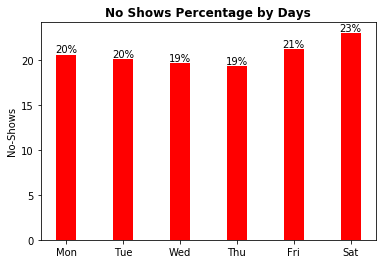

In [144]:

## Bar chart representing No Show Day Wise - Gender Neutral
labels=["No-Show-Monday","No-Show-Tuesday","No-Show-Wednesday","No-Show-Thursday","No-Show-Friday","No-Show-Saturday"]

data1 = [percentage_missed_appts_on_monday,percentage_missed_appts_on_tuesday,percentage_missed_appts_on_wednesday,\
       percentage_missed_appts_on_thursday,percentage_missed_appts_on_friday,percentage_missed_appts_on_saturday]
width = 0.35       # the width of the bars
ylabel="No-Shows"
title = "No Shows Percentage by Days"
xticklabels=('Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat')
drawSingleBarCharts(labels,data1,width,ylabel,title,xticklabels)



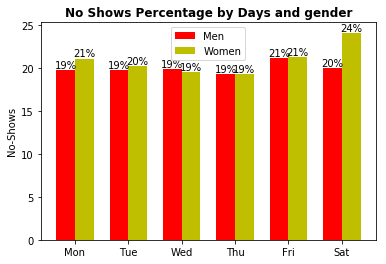

In [145]:

#### Bar chart showing missed male and female appointments for each day of the week. 
labels=["No-Show-Monday","No-Show-Tuesday","No-Show-Wednesday","No-Show-Thursday","No-Show-Friday","No-Show-Saturday"]
data1 = [percentage_missed_male_appts_on_monday,percentage_missed_male_appts_on_tuesday,percentage_missed_male_appts_on_wednesday,\
       percentage_missed_male_appts_on_thursday,percentage_missed_male_appts_on_friday,percentage_missed_male_appts_on_saturday]

width = 0.35       # the width of the bars
data2 = [percentage_missed_female_appts_on_monday,percentage_missed_female_appts_on_tuesday,percentage_missed_female_appts_on_wednesday,\
       percentage_missed_female_appts_on_thursday,percentage_missed_female_appts_on_friday,percentage_missed_female_appts_on_saturday]


# add some text for labels, title and axes ticks
ylabel='No-Shows'
title='No Shows Percentage by Days and gender'
xticklabels=('Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat')
legend1="Men"
legend2= "Women"
drawDoubleBarCharts(labels,data1,data2,width,ylabel,title,xticklabels,legend1,legend2)



The data clearly shows that there is no huge variation when it comes to missing appointments with respect to specific days in the week. Also both women and miss around 20% of appointments each day and there is no huge gender specific variations seen here.

<a id='conclusions'></a>
## Conclusions

Based on the above analysis the following co-relation could be observed
1. Enrollment in welfare program  plays a major role in whether someone skips scheduled appointments or not. Poor Enrollment is seen for the welfare program. 
2. More Female appointments are seen compared to Male appointments. 
3. Day of the week seems to be not be not playing a major role of whether someone is skipping appointment or not.

Limitations:
1. Enough information is not there in the dataset to analyse why poor enrollment is seen for the welfare program. If this is available then further analysis could be done to understand reasons behind no-show.One way of doing this is to check with the patient why they did not enrol for the welfare program. Then this data (reasons) could be grouped together in different categories to understand the reasons. Top 5 categories could then be used to increase the enrollment. 
2. Enough information is not there in the dataset to conclude why female appointments are more compared to the male appointments. If the dataset contains disease categories, then this would help in analysing the trends. Also male vs female population statistics of that area could be used to determine whether there is abnormal increase in female patients compared to male patients. 


Further statistical tests are needed to determine whether the above co-relation lead to causation. 
